In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.neighbors

In [26]:
male_df = pd.read_csv('C:\School\BigData\Big_Data\male.csv')
trimmed_male_data = male_df[['stature']]

In [27]:
trimmed_male_data = male_df[['stature', 'weightkg', 'chestbreadth', 'waistbreadth', 'hipbreadth', 'waistcircumference', 'Ethnicity']]
#male_df.head()
test_df = trimmed_male_data.head()
test_df.tail()

,stature,weightkg,chestbreadth,waistbreadth,hipbreadth,waistcircumference,Ethnicity
0,1776,815,291,329,332,933,NaN
1,1702,726,269,316,312,870,NaN
2,1735,929,288,329,349,964,NaN
3,1655,794,296,315,338,857,NaN
4,1914,946,304,303,332,868,NaN


In [28]:
#weight_height_male = trimmed_male_data['stature', 'weightkg']
weight_height_male_df = pd.read_csv('C:\School\BigData\Big_Data\male.csv', usecols=['stature', 'weightkg'])
weight_height_male_df.rename(columns={'weightkg':'Kg', 'stature':'Cm'}, inplace=True)
weight_height_male_df['Kg'] = weight_height_male_df['Kg'].multiply(0.1)
weight_height_male_df['Cm'] = weight_height_male_df['Cm'].multiply(0.1)

small_df = weight_height_male_df.head(10)
small_df.head(15)

,Cm,Kg
0,177.6,81.5
1,170.2,72.6
2,173.5,92.9
3,165.5,79.4
4,191.4,94.6
5,172.0,80.2
6,181.0,116.2
7,185.0,95.4
8,177.7,99.5
9,181.1,70.2


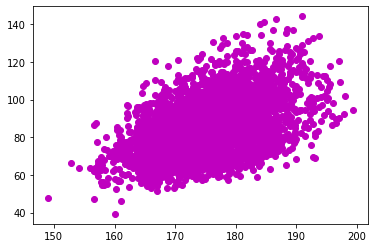

In [29]:
#matplotlib.pyplot.subplot
#weight_height_male_df.plot(x='Kg', y='Cm', kind='scatter')
small_df = weight_height_male_df.head(10)
#small_df.head(15)
#small_df.plot(x='Kg', y='Cm',)

height = []
weight = []

for row in weight_height_male_df.itertuples():
    ones_height = row[1]
    ones_weight = row[2]
    height.append(ones_height)
    weight.append(ones_weight)

#'r = color, o = dots'
#We can set this value with each persons.size val
colors = ['go', 'yo', 'co', 'bo', 'ro', 'po', 'mo']
plt.plot(height, weight, 'mo')
plt.show()

In [30]:
weight_height_male_df['Kg'].min()
#.round(decimal=1)

39.300000000000004

In [31]:
class Size:
    xs = "XSMALL"
    s = "SMALL"
    m = "MEDIUM"
    l = "LARGE"
    xl = "XLARGE"
    xxl = "XXLARGE"
    xxxl = "XXXLARGE"


class Person:
    def __init__(self, weight, height, *args):
        self.weight = weight
        self.height = height

        #self.chestbreadth = args.chestbreadth
        #self.waistbreadth = args.waistbreadth
        #self.hipbreadth = args.hipbreadth

        self.size = Size.xs if (height <= 169) & (weight <= 55) else Size.s if (height <= 178) & (weight <= 65) else Size.m if (height <= 182) & (weight <= 75) else Size.l if (height <= 186) & (weight <= 85) else Size.xl if (height <= 190) & (weight <= 90) else Size.xxl if (height <= 194) & (weight <= 95) else Size.xxxl


In [32]:
people = []



weight_height_male_df['Size'] = ''
for row in weight_height_male_df.itertuples():
    height = row[1]
    weight = row[2]
    person = Person(weight, height)
    people.append(person)

In [33]:
#weight_height_male_df

In [34]:
people[4].size

'XXLARGE'

In [35]:
everyones_size = []
for person in people:
    everyones_size.append(person.size)

weight_height_male_df['Size'] = everyones_size

In [36]:
weight_height_male_df.head()
small_df = weight_height_male_df.head(10)
small_df.head(10)

,Cm,Kg,Size
0,177.6,81.5,LARGE
1,170.2,72.6,MEDIUM
2,173.5,92.9,XXLARGE
3,165.5,79.4,LARGE
4,191.4,94.6,XXLARGE
5,172.0,80.2,LARGE
6,181.0,116.2,XXXLARGE
7,185.0,95.4,XXXLARGE
8,177.7,99.5,XXXLARGE
9,181.1,70.2,MEDIUM


In [37]:
from sklearn.neighbors import NearestNeighbors

arr_of_ars_of_measurements = []
for person in people:
    measurements = [person.weight, person.height]
    arr_of_ars_of_measurements.append(measurements)

#https://scikit-learn.org/stable/modules/neighbors.html#classification
# 1.6.1. Unsupervised Nearest Neighbors
# x =  arr_of_ars_of_measurements

neighbours = NearestNeighbors(n_neighbors=3, radius=0.2).fit(arr_of_ars_of_measurements)
distances, indices = neighbours.kneighbors(arr_of_ars_of_measurements)

print(distances)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
#print(indices)

[[0.         0.         0.1       ]
 [0.         0.1        0.2       ]
 [0.         0.36055513 0.5       ]
 ...
 [0.         0.31622777 0.4472136 ]
 [0.         0.2236068  0.4       ]
 [0.         0.2236068  0.60827625]]
~~~~~~~~~~~~~~~~~~~~~~~~~~


In [38]:
from sklearn.neighbors import KNeighborsClassifier

KN_Classifier = KNeighborsClassifier(n_neighbors=3)

values = []
sizes  = []

for person in people:
    print(person.weight)
    print(person.height)
    kg_and_cm = [round(person.weight,3), round(person.height, 3)]
    values.append(kg_and_cm)
    sizes.append(person.size)


reshaped_measurements = np.array(values).reshape(-1, 2)
#reshaped_measurements[person][0 = weight, 1 = height]
#one_one = reshaped_measurements[1][1]
KN_Classifier.fit(reshaped_measurements, sizes)

min_vikt = [[60, 176]]
prediction_size = KN_Classifier.predict(min_vikt)
probability = KN_Classifier.predict_proba(min_vikt)
score = KN_Classifier.score

81.5
177.60000000000002
72.60000000000001
170.20000000000002
92.9
173.5
79.4
165.5
94.60000000000001
191.4
80.2
172.0
116.2
181.0
95.4
185.0
99.5
177.70000000000002
70.2
181.10000000000002
88.2
178.0
70.10000000000001
173.3
103.7
181.4
111.60000000000001
186.10000000000002
89.60000000000001
170.9
92.4
174.0
77.9
169.4
96.9
176.60000000000002
76.0
174.8
90.80000000000001
179.4
71.4
178.0
74.60000000000001
168.0
79.2
165.3
91.5
195.9
96.5
175.5
67.5
163.0
107.30000000000001
182.5
79.30000000000001
179.5
78.2
174.5
88.2
181.8
71.5
188.10000000000002
94.7
176.0
66.5
167.5
87.9
185.20000000000002
67.5
178.5
88.4
179.10000000000002
69.5
168.5
121.80000000000001
185.0
71.9
173.70000000000002
88.10000000000001
174.3
57.5
174.4
87.60000000000001
167.9
85.0
183.60000000000002
86.5
173.0
95.80000000000001
176.20000000000002
66.7
166.9
70.60000000000001
174.0
84.7
170.9
101.30000000000001
187.9
85.60000000000001
167.4
109.5
177.9
83.4
184.4
72.7
163.70000000000002
98.60000000000001
175.4
77.300000

In [39]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Predicted Size: ' + str(prediction_size))
print()
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Probability: ')
print('xs|~~~~~~~|s|~~~~~~~|m|~~~~~~~|l|~~~~~~~|xl|~~~~~~|xxl|~~~~~|xxxl|')
print(probability[0])
for accuracy in probability[0]:
    pass
    #print(probability[])
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Predicted Size: ['SMALL']

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Probability: 
xs|~~~~~~~|s|~~~~~~~|m|~~~~~~~|l|~~~~~~~|xl|~~~~~~|xxl|~~~~~|xxxl|
[0. 0. 1. 0. 0. 0. 0.]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [42]:
import math

lengths = []
weights = []
deltas = []
for person in people:
    lengths.append(round(person.height, 3))
    weights.append(round(person.weight, 3))
    a = person.height * person.height
    b = person.weight * person.weight
    c = a + b
    delta = round(math.sqrt(c), 3)
    deltas.append(delta)

weight_height_male_df['deltapoint'] = deltas
#print(deltas)

In [43]:
weight_height_male_df.head()

,Cm,Kg,Size,deltapoint
0,177.6,81.5,LARGE,195.407
1,170.2,72.6,MEDIUM,185.037
2,173.5,92.9,XXLARGE,196.806
3,165.5,79.4,LARGE,183.561
4,191.4,94.6,XXLARGE,213.502


In [48]:
min_vikt = [[60, 176]]
print(KN_Classifier.predict(min_vikt))


a = 60 * 60
b = 176 * 176
my_delta = a + b
my_delta = round(math.sqrt(c), 3)
print(my_delta)

['SMALL']
207.649


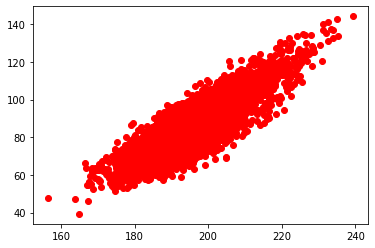

In [69]:
#first_20 = deltas[:19]
plt.plot(deltas, weights, 'ro')

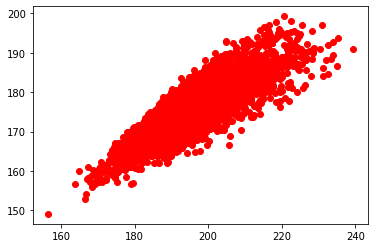

In [68]:
plt.plot(deltas, lengths, 'ro')